In [1]:
# 필요모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, f1_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_clf_eval(y_test,pred,pred_proba):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율:{recall:.4f}, f1-스코어:{f1:.4f}, auc스코어:{auc:.4f}')

def get_eval_by_threshold(y_test,pred_proba,thresholds):
    for th in thresholds:
        pred_proba_1 = pred_proba[:,1].reshape(-1,1)
        binarizer = Binarizer(threshold=th)
        custom_pred = binarizer.fit_transform(pred_proba_1)
        print('임계값 : ',th)
        get_clf_eval(y_test,custom_pred,pred_proba_1)
        
        
def roc_curve_plot(y_test,pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    start, end = plt.xlim()
    plt.legend()
    
    
    
def precision_recall_curve_plot(y_test,pred_proba):
    predcision, recall, threshold = precision_recall_curve(y_test,pred_proba)
    threshold_boundary = threshold.shape[0]
    plt.plot(threshold,predcision[0:threshold_boundary], linestyle='--',label='precision')
    plt.plot(threshold,recall[0:threshold_boundary],label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
# 데이터 로드
diabetes = pd.read_csv('data/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# 결과값 탐색
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
# 대략적인 정보 탐색
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# train, test split
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [8]:
# model

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [9]:
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율:0.5741, f1-스코어:0.6392, auc스코어:0.7919


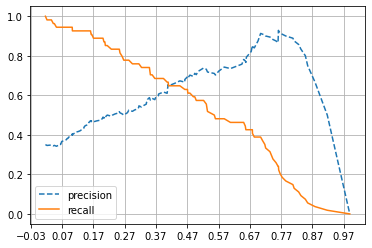

In [10]:
precision_recall_curve_plot(y_test,pred_proba)

In [11]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

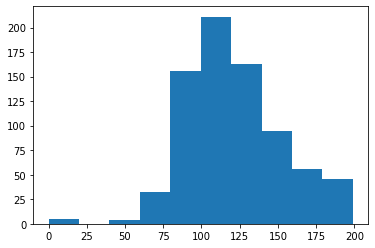

In [12]:
plt.hist(diabetes.Glucose)

In [13]:
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [14]:
cnt = diabetes.Glucose.count()
#for feature in zero_features:
    


In [15]:
mean_zero_fetures = diabetes[zero_features].mean()
diabetes[zero_features] = diabetes[zero_features].replace(0,mean_zero_fetures)

In [16]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
# train, test split
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

# model
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[89 11]
 [19 35]]
정확도: 0.8052, 정밀도: 0.7609, 재현율:0.6481, f1-스코어:0.7000, auc스코어:0.8424


In [18]:
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba,thresholds)

임계값 :  0.3
오차행렬
[[70 30]
 [10 44]]
정확도: 0.7403, 정밀도: 0.5946, 재현율:0.8148, f1-스코어:0.6875, auc스코어:0.8424
임계값 :  0.33
오차행렬
[[73 27]
 [14 40]]
정확도: 0.7338, 정밀도: 0.5970, 재현율:0.7407, f1-스코어:0.6612, auc스코어:0.8424
임계값 :  0.36
오차행렬
[[77 23]
 [15 39]]
정확도: 0.7532, 정밀도: 0.6290, 재현율:0.7222, f1-스코어:0.6724, auc스코어:0.8424
임계값 :  0.39
오차행렬
[[77 23]
 [15 39]]
정확도: 0.7532, 정밀도: 0.6290, 재현율:0.7222, f1-스코어:0.6724, auc스코어:0.8424
임계값 :  0.42
오차행렬
[[81 19]
 [16 38]]
정확도: 0.7727, 정밀도: 0.6667, 재현율:0.7037, f1-스코어:0.6847, auc스코어:0.8424
임계값 :  0.45
오차행렬
[[83 17]
 [18 36]]
정확도: 0.7727, 정밀도: 0.6792, 재현율:0.6667, f1-스코어:0.6729, auc스코어:0.8424
임계값 :  0.48
오차행렬
[[88 12]
 [18 36]]
정확도: 0.8052, 정밀도: 0.7500, 재현율:0.6667, f1-스코어:0.7059, auc스코어:0.8424
임계값 :  0.5
오차행렬
[[89 11]
 [19 35]]
정확도: 0.8052, 정밀도: 0.7609, 재현율:0.6481, f1-스코어:0.7000, auc스코어:0.8424


In [19]:
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test,pred_th_048,pred_proba[:,1])

오차행렬
[[88 12]
 [18 36]]
정확도: 0.8052, 정밀도: 0.7500, 재현율:0.6667, f1-스코어:0.7059, auc스코어:0.8424
